In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH = 'C:\\Workspace\\min\\open_mj\\train.csv'
data = pd.read_csv(PATH)
data

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr


In [28]:
data.isna().sum() #결측치확인

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [29]:
data.info() #text데이터를 숫자로 변환 - 원핫인코딩 , 범주형데이터 ID,User-ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [30]:
# 1. USER-ID 수치화 - 정석
# 2. Book-ID 수치화 - 미진
# 3. 나라 수치화 - 예림
# 4. 수치 데이터 모델링 - 도경

# Book-ID column에서 'BOOK_' 이외에 STRING이 있는지 확인 -> 없음
data_filtered = data[~data['Book-ID'].astype(str).str.contains('B')]

#Book-ID type을 int로 변경
data['Book-ID'] = data['Book-ID'].str.extract('(\d+)',expand=False) 
# data['Book-ID'] = data['Book-ID'].str.replace('BOOK_','') -> 이 코드도 사용 가능 
data['Book-ID'] = data['Book-ID'].astype(int)


In [31]:
#User-ID type을 int로 변경
data['User-ID'] = data['User-ID'].str.extract('(\d+)',expand=False) 
# data['Book-ID'] = data['Book-ID'].str.replace('BOOK_','') -> 이 코드도 사용 가능 
data['User-ID'] = data['User-ID'].astype(int)

In [32]:
data.info() # Book-ID, User-ID column 을 int로 변환 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  int32  
 2   Book-ID              871393 non-null  int32  
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 59.8+ MB


In [34]:
## 나라 도출하기
# Location column에서 value를 , 로 split
Loc = data['Location'].str.split(',').str[-1]

#원래 데이터와 합치기
data = pd.concat([data, Loc], axis=1)
data = data.rename(columns={data.columns[-1]: 'Country'})
data            

,ID,User-ID,Book-ID,Book-Rating,Age,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,TRAIN_000000,0,44368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,canada
1,TRAIN_000001,0,81205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,canada
2,TRAIN_000002,0,86781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,canada
3,TRAIN_000003,0,98622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon,canada
4,TRAIN_000004,0,180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,canada
...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,92096,81138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins,usa
871389,TRAIN_871389,92097,258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony,usa
871390,TRAIN_871390,92098,71848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press,canada
871391,TRAIN_871391,92099,252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr,usa


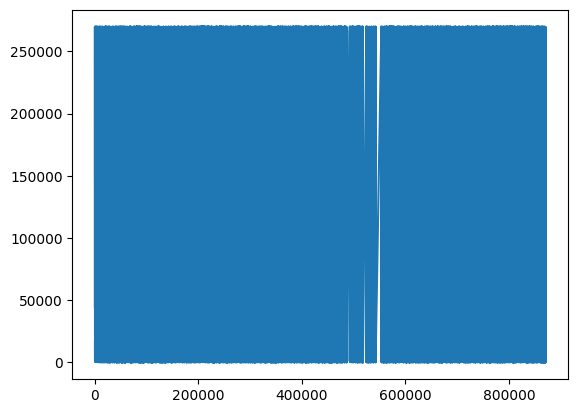

In [46]:
plt.plot(data['Book-ID'])


----------------------

In [ ]:
## 삽질

# filtered = data[data['Location'] == 'n/a, n/a, n/a']
# filtered_over0 = filtered[filtered['Book-Rating'] > 0]


# Loc = data['Location'].str.split(',').str[-1]

# data = pd.concat([data, Loc], axis=1)
# data.rename(columns={-1:'Country'}, inplace=True)
# data.columns.values[-1] = 'Country'


# filtered = data[data['Location'] == 'n/a, n/a, n/a']
# filtered
# filtered_over0 = filtered[filtered['Book-Rating'] > 0]
# filtered_over0

# values counts X축
# values는 y축
# data.Location.value_counts()


# age_counts = data.Age.value_counts()
# age1 = age_counts[age_counts > 20000].index.tolist()
# filtered_data = data[data['Age'].isin(age1)]
# age1_counts = filtered_data.Age.value


# data['Book-Title'].value_counts()

#book ID가 1개 보다 많은 것 (하나보다 많이 팔린?)
# book_counts = data['Book-ID'].value_counts()
# filtered_counts = book_counts[book_counts > 1]




## book counts가 하나인 것 평점 확인
# get Book-ID values where the value counts is 1
# unique_books = book_counts[book_counts == 1].index.tolist()

#filter the data by Book-ID values where the value counts is 1
# filtered_data2 = data[data['Book-ID'].isin(unique_books)][['Book-ID','Book-Rating']]

#print the filtered data
# filtered_data2



# import matplotlib.pyplot as plt

# filtered_data = data[data['Publisher'] >= 1]

#get value counts of Publisher column
# mmj = filtered_data['Publisher'].value_counts() 
# mj = pd.DataFrame(mmj)

#sort the dataframe by the index (i.e., by year)
# j = mj.sort_index()

#plot the graph
# plt.plot(mj.index, mj['Year-Of-Publication'])
# plt.xlabel('Year')
# plt.ylabel('Number of books published')
# plt.title('Books published each year from 1900')
# plt.show()

# mj1 = mj.sort_index()

# author = data['Book-Author'].value_counts()  
# author1 = pd.DataFrame(author)


# data = data.drop(data.columns[-1], axis=1)